In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [48]:
import os

DATASET = 'dataset/Edge-IIoTset-dataset'

for path, dirs, files in os.walk(DATASET):
    for file in files:
        if file.endswith('csv'):
            print(f'{path}/{file}')

dataset/Edge-IIoTset-dataset/Attack traffic/Backdoor_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_UDP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/MITM_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/OS_Fingerprinting_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Password_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Port_Scanning_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Ransomware_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/SQL_injection_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Uploading_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Vulnerability_scanner_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/XSS_attack.csv
dataset/Edge-IIoTset-dataset/Normal traffic/Dist

``` bash
#!/bin/bash

# Find all files with a ".csv" extension in the current directory and its subdirectories
find ./ -type f -name "*.csv" | while read file; do
    # Count the number of lines in each file
    lines=$(wc -l < "$file")
    # Print the file path and its line count
    echo "$file has $lines lines"
done
```

```
./Attack traffic/Backdoor_attack.csv has 24863 lines
./Attack traffic/DDoS_HTTP_Flood_attack.csv has 229023 lines
./Attack traffic/DDoS_ICMP_Flood_attack.csv has 2914355 lines
./Attack traffic/DDoS_TCP_SYN_Flood_attack.csv has 2020121 lines
./Attack traffic/DDoS_UDP_Flood_attack.csv has 3201627 lines
./Attack traffic/MITM_attack.csv has 1230 lines
./Attack traffic/OS_Fingerprinting_attack.csv has 1002 lines
./Attack traffic/Password_attack.csv has 1053386 lines
./Attack traffic/Port_Scanning_attack.csv has 22565 lines
./Attack traffic/Ransomware_attack.csv has 10926 lines
./Attack traffic/SQL_injection_attack.csv has 51204 lines
./Attack traffic/Uploading_attack.csv has 37635 lines
./Attack traffic/Vulnerability_scanner_attack.csv has 145870 lines
./Attack traffic/XSS_attack.csv has 15916 lines
./Normal traffic/Distance/Distance.csv has 1143541 lines
./Normal traffic/Flame_Sensor/Flame_Sensor.csv has 1070197 lines
./Normal traffic/Heart_Rate/Heart_Rate.csv has 165320 lines
./Normal traffic/IR_Receiver/IR_Receiver.csv has 1307779 lines
./Normal traffic/Modbus/Modbus.csv has 159503 lines
./Normal traffic/phValue/phValue.csv has 746909 lines
./Normal traffic/Soil_Moisture/Soil_Moisture.csv has 1192778 lines
./Normal traffic/Sound_Sensor/Sound_Sensor.csv has 1512884 lines
./Normal traffic/Temperature_and_Humidity/Temperature_and_Humidity.csv has 1615723 lines
./Normal traffic/Water_Level/Water_Level.csv has 2295289 lines
./Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv has 2219202 lines
./Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv has 157801 lines
```

ML-EdgeIIoT-dataset

In [49]:
df  = pd.read_csv('./dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [51]:
print(df['Attack_type'].value_counts())

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64


In [52]:
from sklearn.utils import shuffle

drop_columns = ['frame.time', 
                'ip.src_host', 
                'ip.dst_host', 
                'arp.src.proto_ipv4',
                'arp.dst.proto_ipv4', 
                'http.file_data',
                'http.request.full_uri',
                'icmp.transmit_timestamp',
                'http.request.uri.query', 
                'tcp.options',
                'tcp.payload',
                'tcp.srcport',
                'tcp.dstport', 
                'udp.port', 
                'mqtt.msg']

df.drop(drop_columns, axis=1, inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

df.dropna(axis=0, how='any', inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

df.drop_duplicates(subset=None, keep='first', inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )




df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

> NA: 0, DUPS: 5604
> NA: 0, DUPS: 5604
> NA: 0, DUPS: 0
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64


In [53]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152196 entries, 154474 to 23036
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         152196 non-null  float64
 1   arp.hw.size                                                                        152196 non-null  float64
 2   icmp.checksum                                                                      152196 non-null  float64
 3   icmp.seq_le                                                                        152196 non-null  float64
 4   icmp.unused                                                                        152196 non-null  float64
 5   http.content_length                                                                152196 non-

In [74]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit

# 39  Attack_label                                                                       152196 non-null  int64  
# 40  Attack_type                                                                        152196 non-null  object 

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'
target_label_15_class_cat = 'Attack_type_cat'

df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])


Y = df[target_label_2_class]


X = df.drop([target_label_2_class, target_label_15_class, target_label_15_class_cat], axis=1, inplace=False)

print(f'{Y.shape}, {X.shape}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


(152196,), (152196, 74)


In [10]:
# from sklearn import svm

# clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
# clf.score(X_test, Y_test)


In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')



Accuracy: 1.0


In [61]:

print( len(X_train.columns), len(clf.feature_importances_))


for imp, col in zip(clf.feature_importances_, X_train.columns):
    if imp > 0:
        print(imp, col)

74 74
1.0 mqtt.topic-0.0


KeyError: "['Attack_type'] not found in axis"

15 classes

In [79]:

Y = df[target_label_15_class_cat]
X = df.drop([target_label_2_class, target_label_15_class, target_label_15_class_cat], axis=1, inplace=False)

print(f'{Y.shape}, {X.shape}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


(152196,), (152196, 74)


In [80]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [120]:
predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

for imp, col in sorted(zip(clf.feature_importances_, X_train.columns), key=lambda x: x[0], reverse=True):
    if imp > 0:
        print(f'{imp:.5f}, {col}')


Accuracy: 0.9326204438312061
0.24606, tcp.ack
0.15762, mqtt.topic-0.0
0.10183, tcp.ack_raw
0.10030, udp.stream
0.09151, icmp.seq_le
0.07168, http.referer-0.0
0.07046, http.request.method-0.0
0.05397, tcp.checksum
0.03091, tcp.connection.rst
0.02760, tcp.len
0.02669, tcp.seq
0.00811, http.request.version-0
0.00801, tcp.flags
0.00344, http.request.version-HTTP/1.0
0.00087, tcp.connection.fin
0.00068, tcp.connection.synack
0.00009, tcp.flags.ack
0.00007, http.response
0.00006, icmp.checksum
0.00003, arp.opcode
0.00002, http.request.version-HTTP/1.1
0.00000, arp.hw.size


Confusion matrix, without normalization
[[5237    0    0    0    0    0    0    0    1    0    0    0    0    2
     0]
 [   0 3337    0    0    0    0    0    0   81    0    0   91    0   62
     0]
 [   0    0 3723    0  362    0    0    0    0    0    0    0  100    0
     0]
 [   0    0    0 3444    0  352  413    0    0    0    0    0    0    0
     0]
 [   0    0  400    0 3307    0    0    0    0    0    0    0   67    0
     0]
 [   0    0    0  354    0 3248  356    0    0    0    0    0    0    0
     0]
 [   0    0    0  345    0  407 3356    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0 9656    0    0    0    0    0    0
     0]
 [   0   60    0    0    0    0    0    0 3775    0    0  129    0   15
     0]
 [   0    0    0    0    0    0    0    0    0 4017    0    0    0    0
     0]
 [   1    0    0    0    0    0    0    0    0    0 5827    0    0    0
     0]
 [   0  101    0    0    0    0    0    0  128    0    0 3636    0   35
     0]


<Figure size 160000x160000 with 0 Axes>

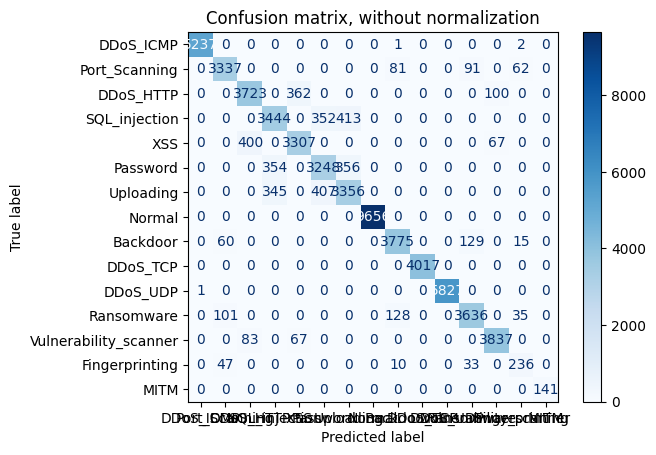

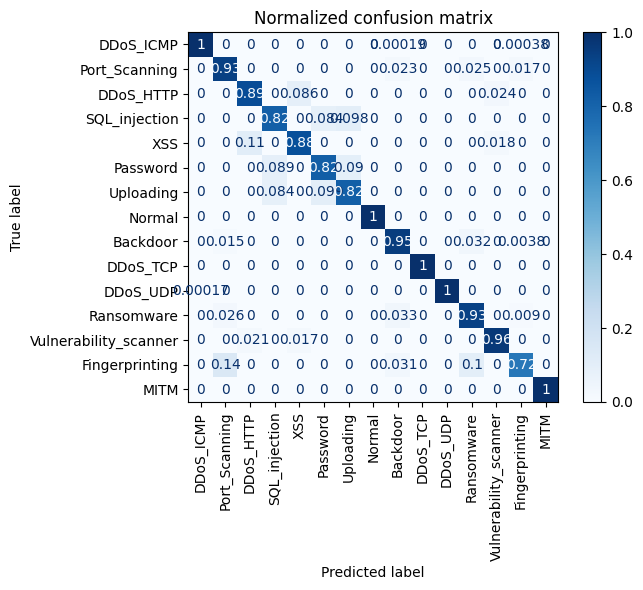

In [88]:



from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]


plt.figure(figsize=(1600, 1600)) 

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        display_labels=Attack_type_classes,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.xticks(rotation=90)
plt.show()

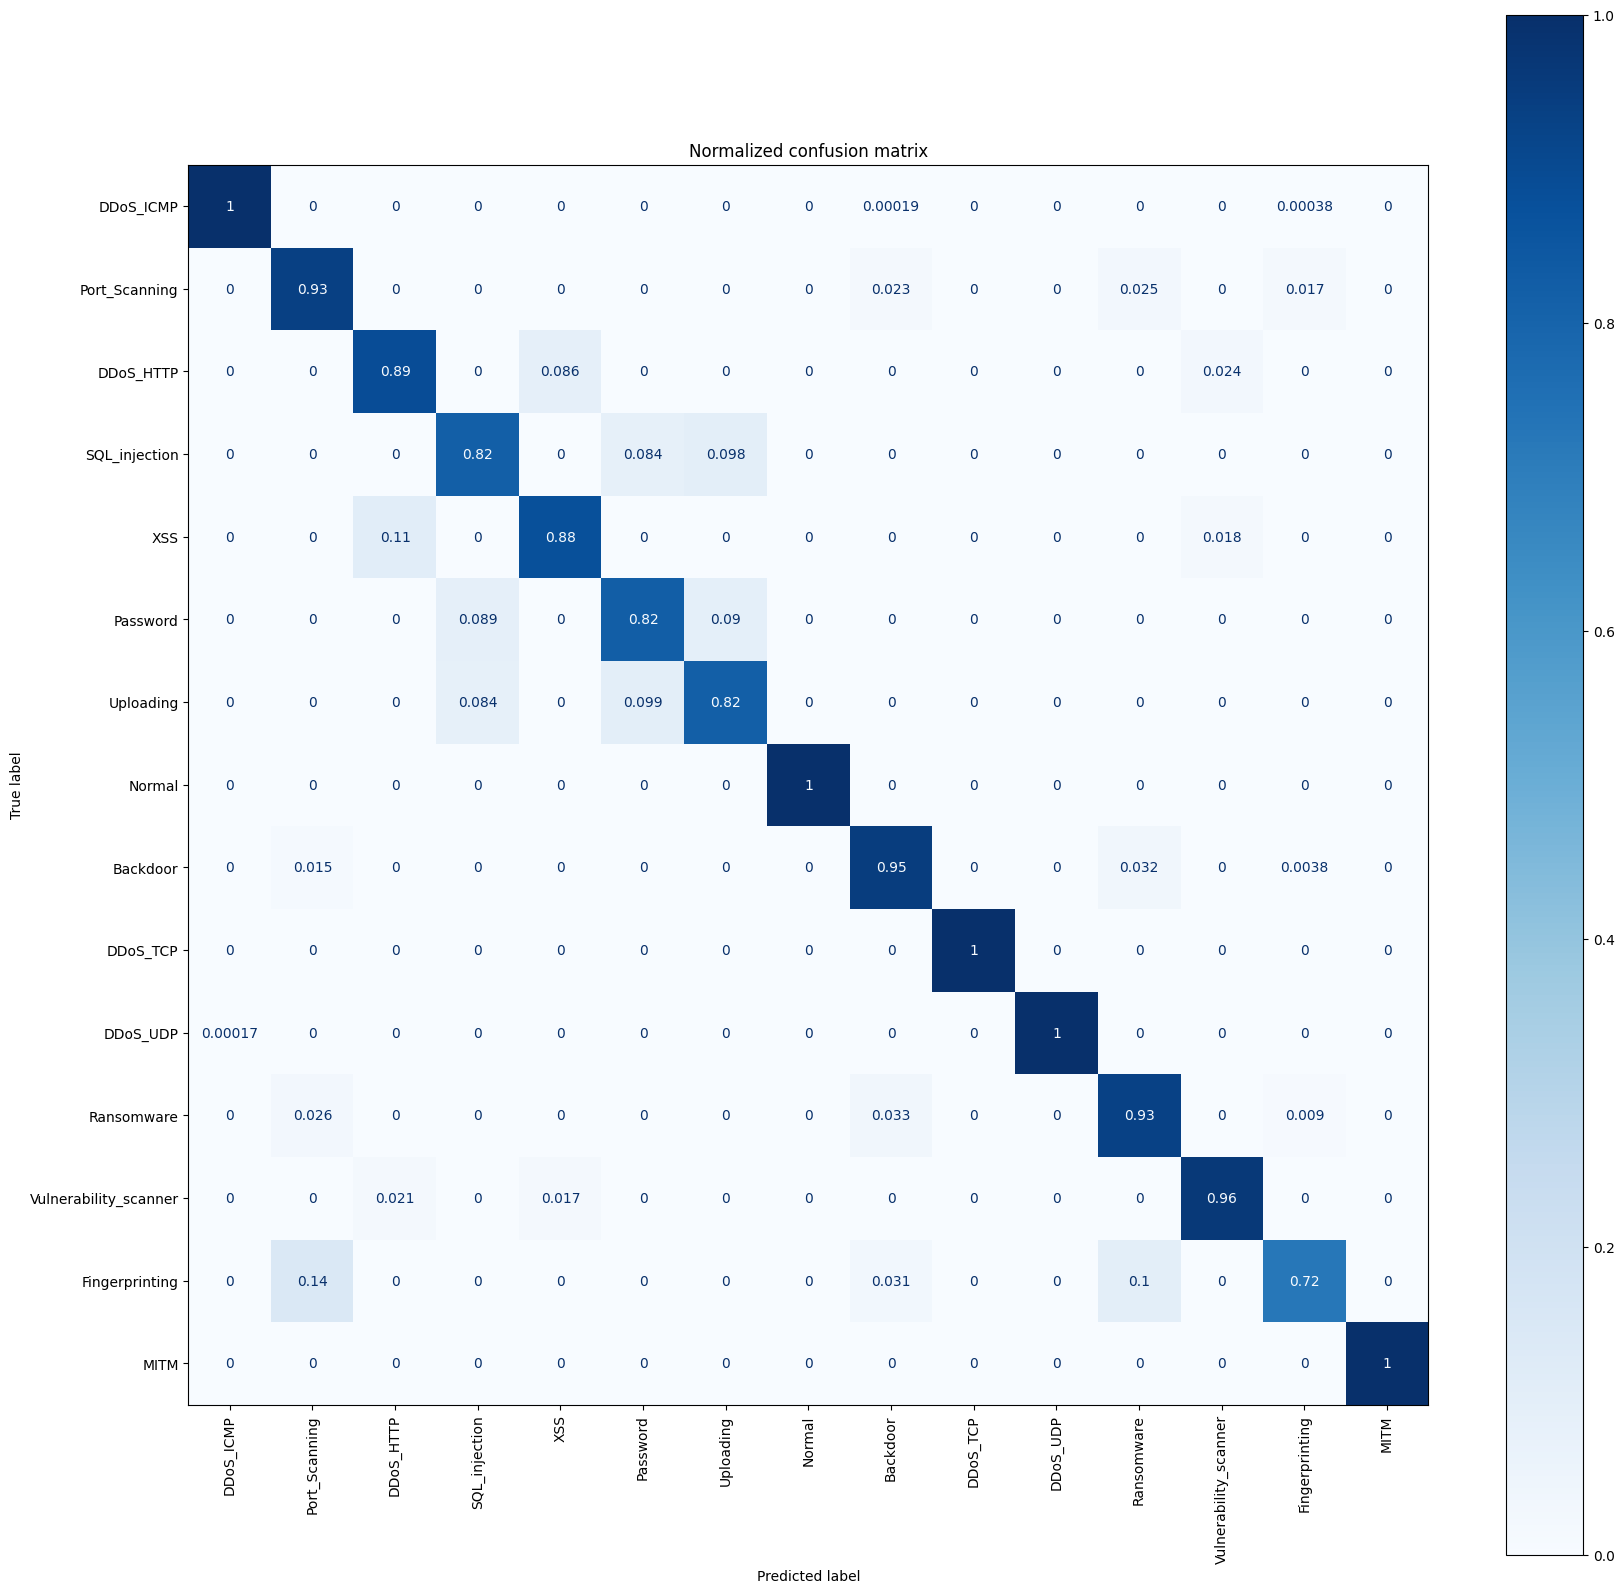

In [98]:

from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]


title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    Y_test,
    display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize=normalize,
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(20, 20, forward=True)
plt.xticks(rotation=90)
plt.show()

In [115]:
from sklearn.metrics import precision_recall_fscore_support

predicted = clf.predict(X_test)

precision_recall_fscore_support(Y_test, predicted, average=None)


(array([0.99980909, 0.94132581, 0.88516405, 0.83128168, 0.88517131,
        0.81058148, 0.81357576, 1.        , 0.94493116, 1.        ,
        1.        , 0.93494472, 0.95829171, 0.67428571, 1.        ]),
 array([0.99942748, 0.93447214, 0.88960573, 0.81824661, 0.87625861,
        0.82061647, 0.81694255, 1.        , 0.94873084, 1.        ,
        0.99982841, 0.93230769, 0.96237773, 0.72392638, 1.        ]),
 array([0.99961825, 0.93788645, 0.88737934, 0.82471264, 0.88069241,
        0.81556811, 0.81525568, 1.        , 0.94682719, 1.        ,
        0.9999142 , 0.93362434, 0.96033037, 0.69822485, 1.        ]),
 array([5240, 3571, 4185, 4209, 3774, 3958, 4108, 9656, 3979, 4017, 5828,
        3900, 3987,  326,  141]))

In [116]:
from sklearn.metrics import  classification_report


print(classification_report(Y_test, predicted, target_names=Attack_type_classes))

                       precision    recall  f1-score   support

            DDoS_ICMP       1.00      1.00      1.00      5240
        Port_Scanning       0.94      0.93      0.94      3571
            DDoS_HTTP       0.89      0.89      0.89      4185
        SQL_injection       0.83      0.82      0.82      4209
                  XSS       0.89      0.88      0.88      3774
             Password       0.81      0.82      0.82      3958
            Uploading       0.81      0.82      0.82      4108
               Normal       1.00      1.00      1.00      9656
             Backdoor       0.94      0.95      0.95      3979
             DDoS_TCP       1.00      1.00      1.00      4017
             DDoS_UDP       1.00      1.00      1.00      5828
           Ransomware       0.93      0.93      0.93      3900
Vulnerability_scanner       0.96      0.96      0.96      3987
       Fingerprinting       0.67      0.72      0.70       326
                 MITM       1.00      1.00      1.00  

In [ ]:
features = ['tcp.ack',
'mqtt.topic-0.0',
'tcp.ack_raw',
'udp.stream',
'icmp.seq_le',
'http.referer-0.0',
'http.request.method-0.0',
'tcp.checksum',
'tcp.connection.rst',
'tcp.len',
'tcp.seq']



